# Predictor algorithm test script

In [2]:
import numpy as np
import pandas as pd
import time
import os
import sys
import matplotlib.pyplot as plt 

sys.path.append(os.path.abspath('../'))
from src.model.TemperatureData import TemperatureData

folderpath = os.path.join(os.getcwd(), "..", "", "data", "")
temperature_case = 45
datapath = os.path.join(folderpath, f"temperature_{temperature_case}.csv")

In [22]:
df = TemperatureData(datapath).df
data = df[['ElapsedSeconds', 'TemperatureSensorII']]
data.columns = ['t', 'val']
# only select part of data for training and forecasting the future 
ind = 1000
data_seen = data.iloc[:ind]

data_unseen = data.iloc[ind:]

x_predict = data_unseen['t'].values.reshape(-1, 1)

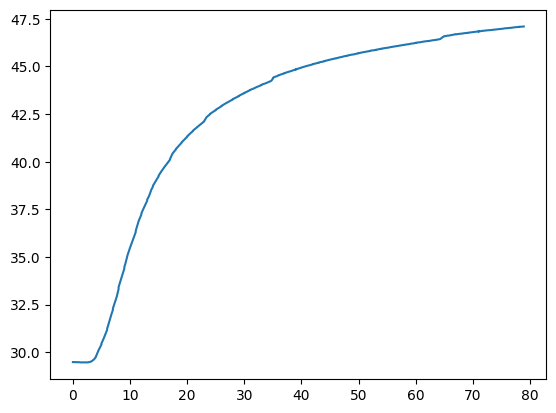

In [23]:
plt.plot(data_seen['t'], data_seen['val'])

In [26]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Assuming 'df' is your DataFrame with 't' and 'val' column
p = q = d = 1
n_steps = 100
# model = ARIMA(data_seen['val'], order=(p, d, q))
# model_fit = model.fit()
model = ARIMA(data_seen['val'], order=(p, d, q))
model_fit = model.fit()

# Forecast with confidence intervals
forecast_res = model_fit.get_forecast(steps=n_steps)
forecast = forecast_res.predicted_mean
stderr = forecast_res.se_mean
conf_int = forecast_res.conf_int(alpha=0.05)


# # Forecast with confidence intervals
# forecast, stderr, conf_int = model_fit.forecast(steps=n_steps, alpha=0.05)


# from statsmodels.tsa.statespace.sarimax import SARIMAX
# P = Q = D = 1
# s = 12
# model = SARIMAX(data_seen['val'], order=(p, d, q), seasonal_order=(P, D, Q, s))
# model_fit = model.fit()

# # Forecast with confidence intervals
# forecast, stderr, conf_int = model_fit.get_forecast(steps=n_steps).summary_frame(alpha=0.05)['mean_ci_lower', 'mean_ci_upper']



# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

# kernel = DotProduct() + WhiteKernel()
# gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
# gpr.fit(data_seen['t'].values.reshape(-1, 1), data_seen['val'])

# # Predicting future values
# t_future = data_unseen['t'].values.reshape(-1, 1)
# predictions, sigma = gpr.predict(t_future, return_std=True)
# conf_int = np.vstack([predictions - 1.96 * sigma, predictions + 1.96 * sigma]).T


# The forecast dataframe contains the mean forecast 'yhat' and the confidence intervals 'yhat_lower', 'yhat_upper'


1000    0.003848
1001    0.007914
1002    0.012727
1003    0.018192
1004    0.024237
          ...   
1095    1.394272
1096    1.413174
1097    1.432109
1098    1.451079
1099    1.470081
Name: var_pred_mean, Length: 100, dtype: float64

<ErrorbarContainer object of 3 artists>

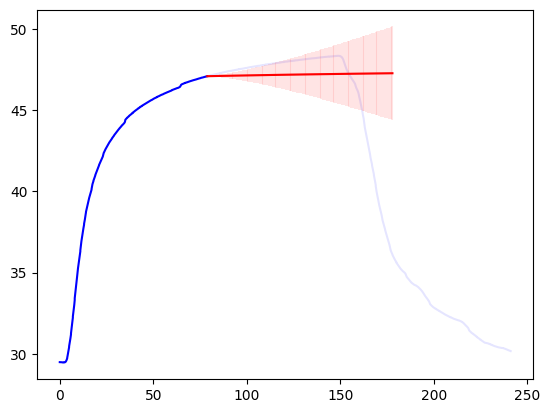

In [32]:
plt.plot(data_seen['t'], data_seen['val'], color='blue')
plt.plot(data_unseen['t'], data_unseen['val'], color='blue', alpha=0.1)
plt.plot(data_seen['t'].values[-1] + np.arange(n_steps), forecast, color='red')
# plot confidence interval using errorbar 
plt.errorbar(data_seen['t'].values[-1] + np.arange(n_steps), forecast, yerr=1.96 * stderr, color='red', alpha=0.1)

# plt.plot(t_future, predictions, color='red')
# # add errorbar to illustrate the confidence interval
# plt.errorbar(t_future, predictions, yerr=1.96 * sigma, color='red', alpha=0.1)


In [29]:
mean_forecast

3078    241.244329
3079    241.321987
3080    241.399639
3081    241.477288
3082    241.554931
Name: predicted_mean, dtype: float64